<a href="https://colab.research.google.com/github/KimSeonHo-719/CV/blob/main/%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
!wget 'https://raw.githubusercontent.com/KimSeonHo-719/CV/main/gyujin.png' -O gyujin.png


--2025-03-31 10:00:17--  https://raw.githubusercontent.com/KimSeonHo-719/CV/main/gyujin.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222295 (217K) [image/png]
Saving to: ‘gyujin.png’

gyujin.png          100%[===================>] 217.08K  --.-KB/s    in 0.01s   

2025-03-31 10:00:18 (18.1 MB/s) - ‘gyujin.png’ saved [222295/222295]



(489, 637, 3)
255 0
uint8


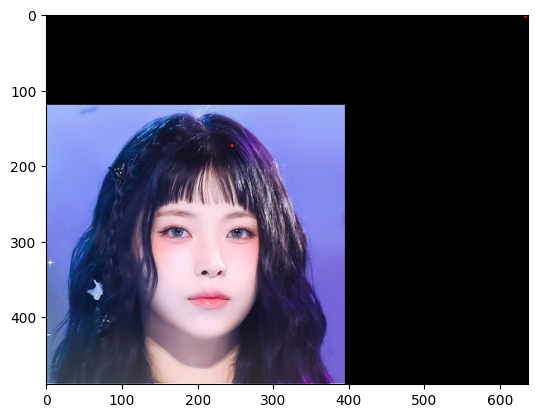

In [16]:
# BGR로 사진 가져오기
img_BGR=cv2.imread('/content/gyujin.png')

# BGR이어서 색상 반전되어있으므로 RGB로 다시 반전시켜 원본으로 만듦.
img_RGB=cv2.cvtColor(img_BGR,cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)
print(img_RGB.shape)
print(img_RGB.max(),img_RGB.min())
print(img_RGB.dtype)


In [27]:
# Average Filter 3x3
kernel_33=np.ones((3,3),dtype=np.float32)/9

# ERROR - operands could not be broadcast together with shapes (489,637,3) (3,3) -> 원본 이미지는 채널 RGB까지 고려하면 3차원임. 하지만 3x3 커널은 2차원임.
# SOLUTION - 실습 때는 patch=3x3, kernel=3x3 이므로 일반 곱셈연산 후 합연산 하면 그게 컨벌루션임. 하지만 여기선 차원도 안맞고 사이즈도 안맞아서 자동으로 브로드캐스팅이 안 되므로 컨벌루션 구현해야 함.
# result=np.sum(img_RGB*kernel_33,axis=2)




In [ ]:
kernel_55=np.ones((5,5),dtype=np.float32)/25
